# Problem Statement: Analysis of Unicorn Startups in India
---
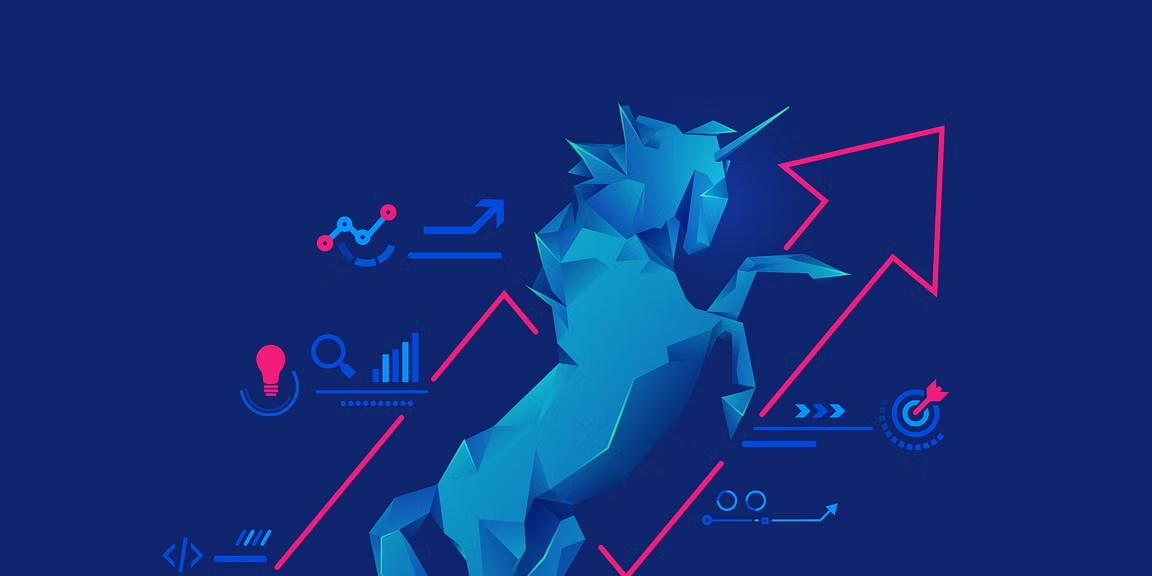

In this project, let's conduct an analysis of Unicorn startups in India . Our objective is to identify the key features that significantly impact the growth and success of startups in India. By exploring various factors such as sector analysis, Valuation amount, geographical distribution, we aim to provide valuable insights and recommendations for the startup ecosystem in India.

In [1]:
import pandas as pd
import re

## 1. Loading the Datasets

We begin by loading the dataset, which can be found on Kaggle:
- Indian Unicorn Startups Dataset: https://www.kaggle.com/datasets/mlvprasad/indian-unicorn-startups-2023-june-updated 

In [2]:
df = pd.read_csv('Data/UnicornStartups.csv')

In [3]:
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


**The raw dataset has the following issues that we can observe:**
- Company names are not formatted Well example: Paytm^ .etc.
- Column names are not so good to deal with.
- Sector column is with main and subsector.
- Entry column shoule be more user friendly.

### Function to clean company names

In [4]:
def clean_string(string):
    cleaned_string = re.sub(r'[^\w\s]+$', '', string)
    cleaned_string = cleaned_string.lower()
    cleaned_string = cleaned_string.capitalize()
    return cleaned_string

In [5]:
df['Company'] = [clean_string(name) for name in df['Company']]

### Function to format sector column

In [6]:
def format_sector(sector):
    if "E-Commerce" in sector:
        return "E-Commerce"
    else:
        sectors = re.split(r'\s*-\s*', sector)
        return sectors[0].strip().capitalize()

In [7]:
df['Main_Sector'] = df['Sector'].apply(format_sector)

### Count the number of investors

In [8]:
df['Number_of_investors'] = df['Select Investors'].apply(lambda x: len(str(x).split(',')))

### Split the Entry column into Month and Year

In [9]:
df[['Month', 'Year']] = df['Entry'].str.split('/', expand=True)

### Rename columns

In [10]:
df.rename(columns={'Entry Valuation^^ ($B)': 'Entry_Valuation ($B)', 'Valuation ($B)': 'Final_Valuation ($B)'}, inplace=True)

### Drop unnecessary columns

In [11]:
drop_cols = ['No.']
df.drop(columns=drop_cols, inplace=True)

In [12]:
df.head()

,Company,Sector,Entry_Valuation ($B),Final_Valuation ($B),Entry,Location,Select Investors,Main_Sector,Number_of_investors,Month,Year
0,Inmobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",Adtech,3,Sep,2011
1,Flipkart,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",E-Commerce,5,Feb,2012
2,Mu sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",Saas,3,Feb,2013
3,Snapdeal,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",E-Commerce,5,Oct,2014
4,Paytm,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",Fintech,4,Feb,2015



Here we performs the following tasks:
1. Reads the raw dataset using `pd.read_csv()`.
2. Cleans the company names using the `clean_company_name()` function. It removes special characters at the end of the name and capitalizes the first letter of each word.
3. Renames the columns to more descriptive names using the `rename()` function.
4. Formats the sector column by extracting the main sector from the string using the `format_sector()` function. It checks if "E-commerce" is present in the sector and formats it accordingly.
5. Formats the entry column by extracting the month and year.
6. Saving the preprocessed file into "PreprocessedUnicorn.csv".

In [13]:
# Save the preprocessed dataset to a CSV file
df.to_csv('Data/PreprocessedUnicorn.csv', index=False)

## Keep coding and stay curious! 🚀 